In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
from os import getcwd
from math import pi
from numpy import pi, linspace, sin, asarray, absolute, zeros


# sin curve parameters 
TRAJ_DICT_LIST = [
    {'a': 1, 'b': 1, 'c': 4, 's': pi,     'h': 0.25},
    {'a': 2, 'b': 3, 'c': 4, 's': 4*pi/3, 'h': 0.25},
    {'a': 1, 'b': 3, 'c': 4, 's': pi,     'h': 0.25},
    {'a': 2, 'b': 2, 'c': 5, 's': pi,     'h': 0.2},
    {'a': 2, 'b': 3, 'c': 5, 's': 8*pi/5, 'h': 0.2},
    {'a': 2, 'b': 4, 'c': 5, 's': pi,     'h': 0.2}
]

TRAJ_HEIGHT = 0.1
TRAJ_WIDTH = 0.3
TRAJ_DEPTH = 0.1


####################################################################################
def get_sine_points(n_points: int, a, b, c, s, h, height, width, depth):

    ampz = h * height

    theta = linspace(0, 2*pi, n_points)
    # npx = zeros(n_points)
    # if use_depth == 1:
    #     npx = absolute(asarray(theta-pi))/pi*depth - (depth/2)
    # npy = theta/(2*pi)*width - (width/2)
    npz = ampz * (sin(a*(theta+s)) + sin(b*(theta+s)) + sin(c*(theta+s)))

    # extract each dimension vector and convert to python list
    # x = npx.tolist()
    # y = npy.tolist()
    z = npz.tolist()

    # for i in range(n_points):
        # x[i] += origin[0]
        # y[i] += origin[1]
        # z[i] += origin[2]

    # return x, y, z
    return z

####################################################################################
def get_traj_points(traj_id):
    traj_params = TRAJ_DICT_LIST[traj_id]
    traj_points_list = get_sine_points(101, traj_params['a'], traj_params['b'], traj_params['c'], traj_params['s'], traj_params['h'], 
                                       TRAJ_HEIGHT, TRAJ_WIDTH, TRAJ_DEPTH)
    return traj_points_list

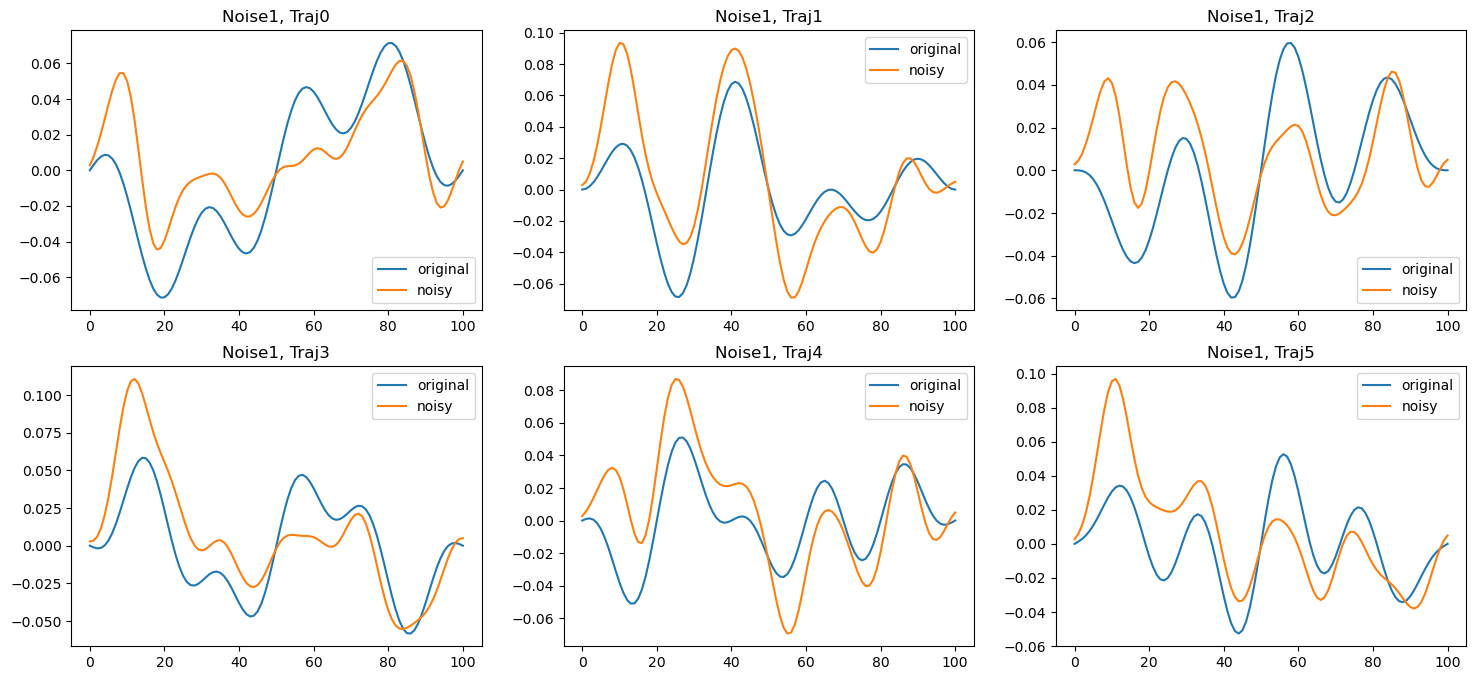

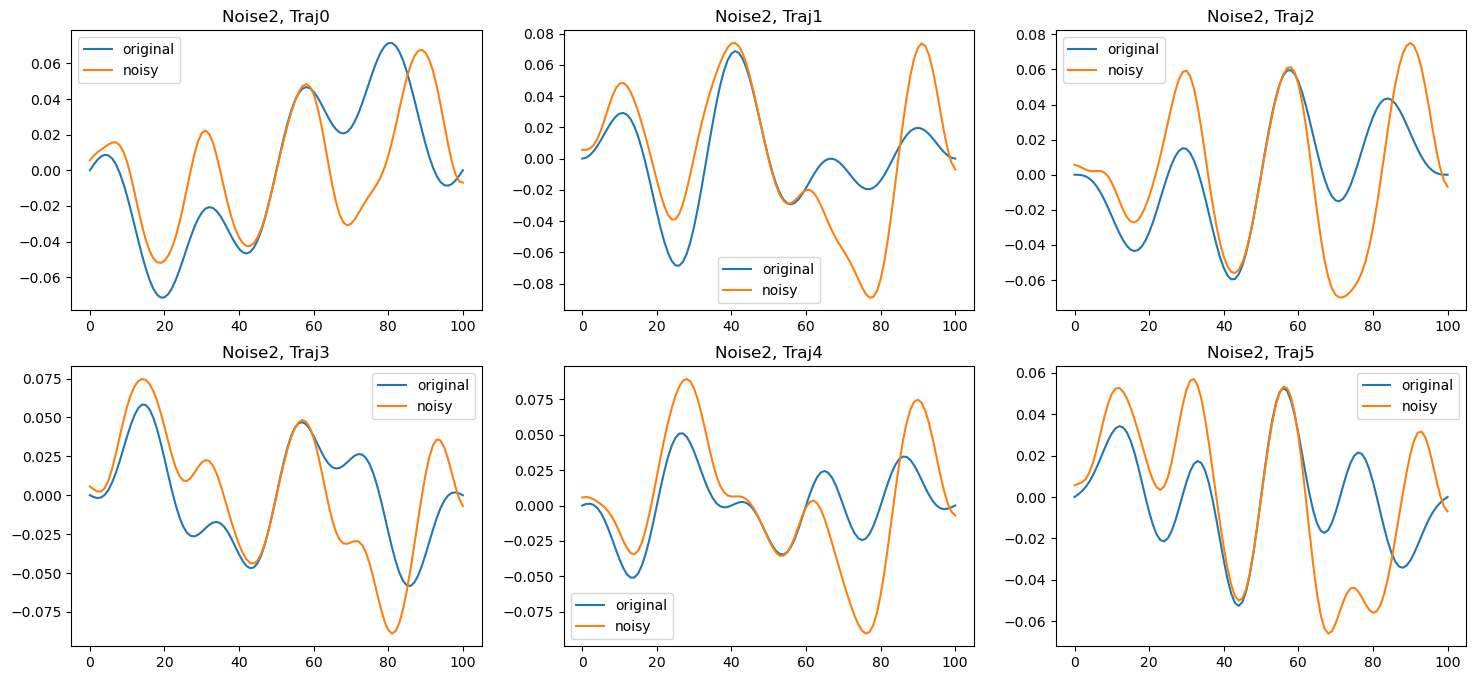

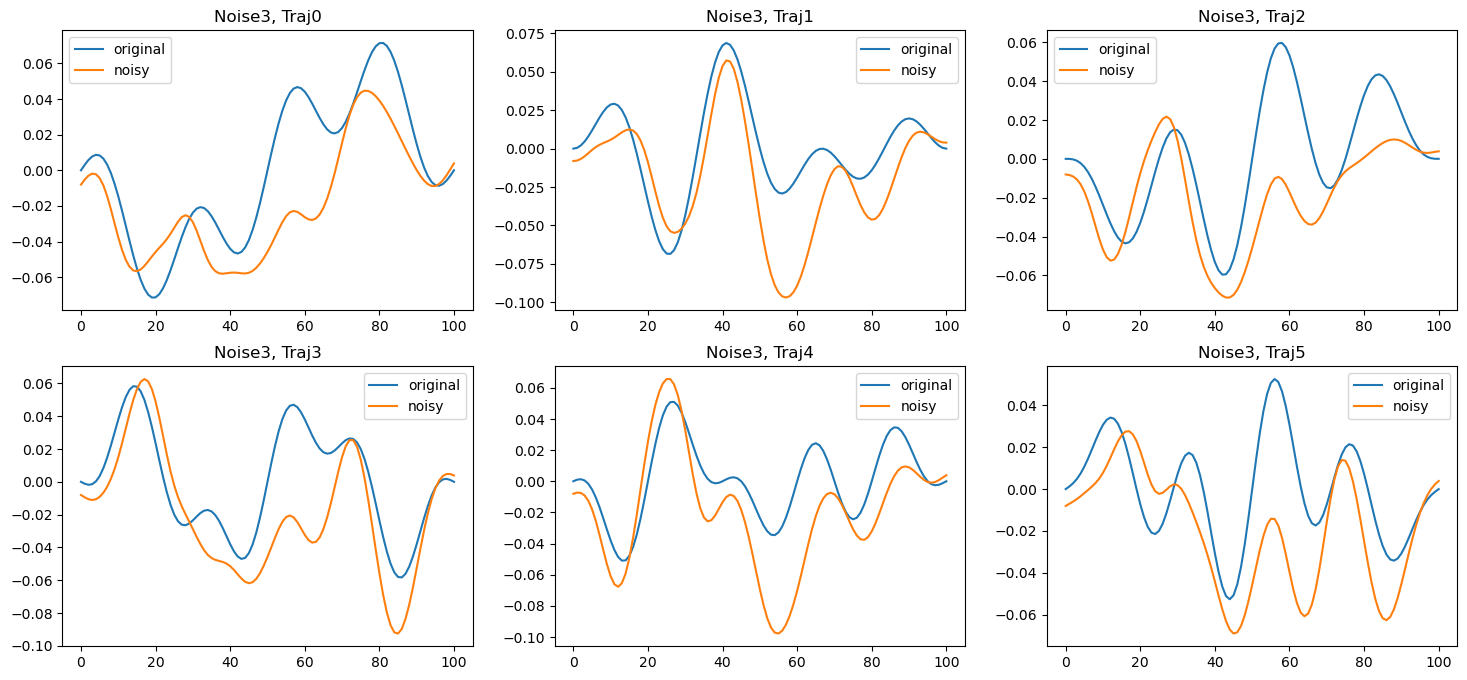

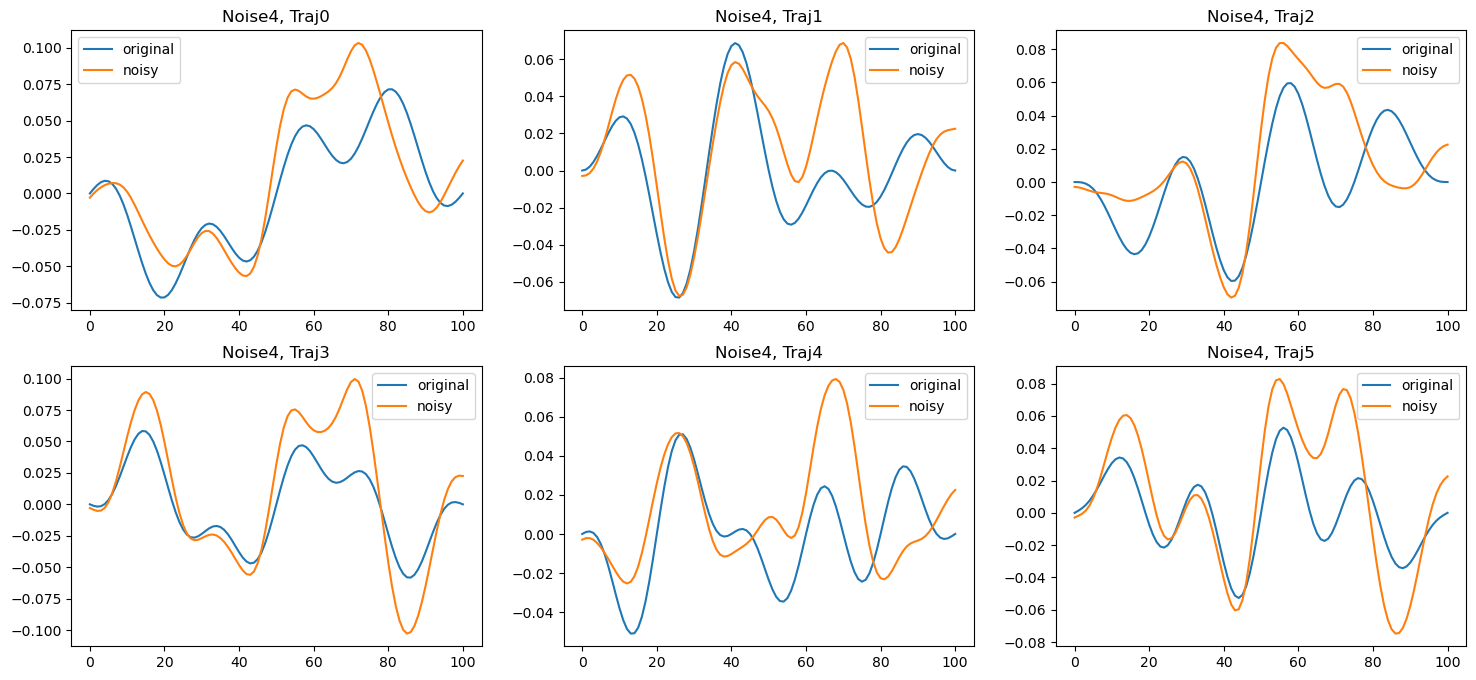

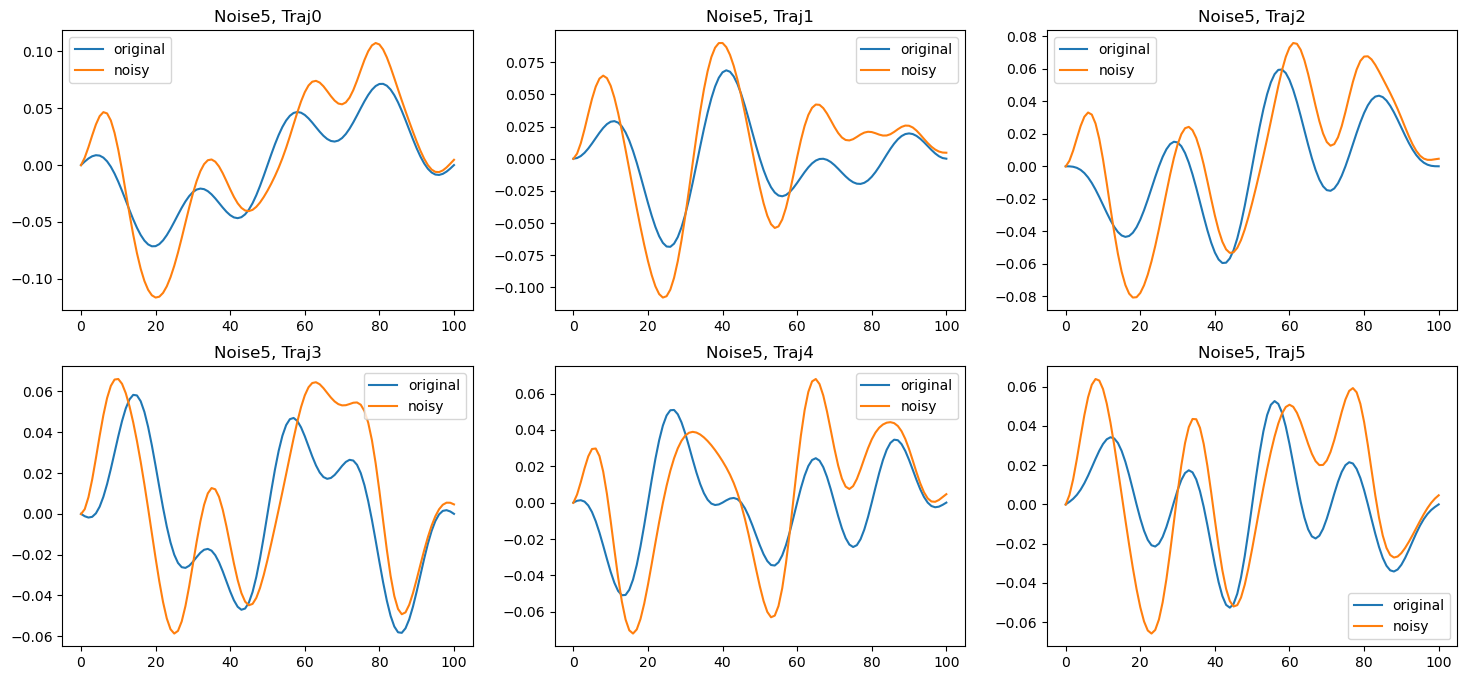

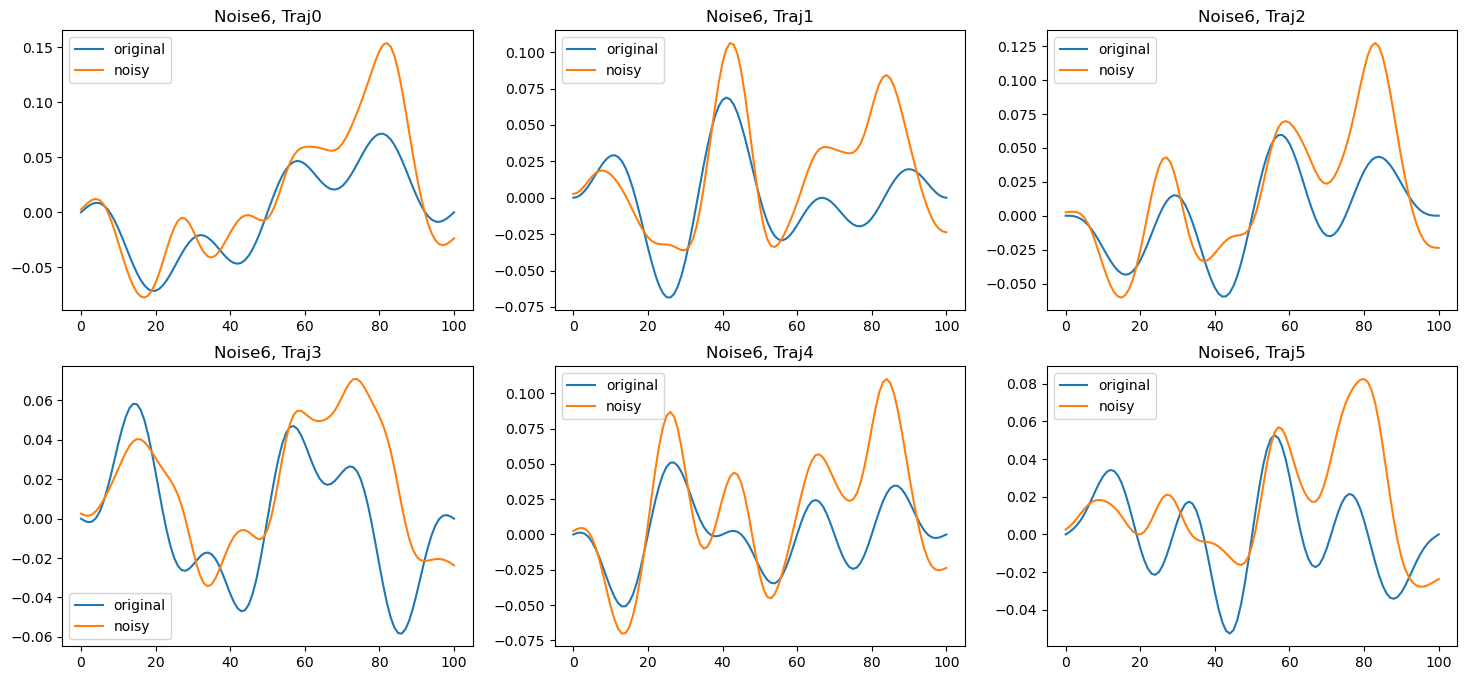

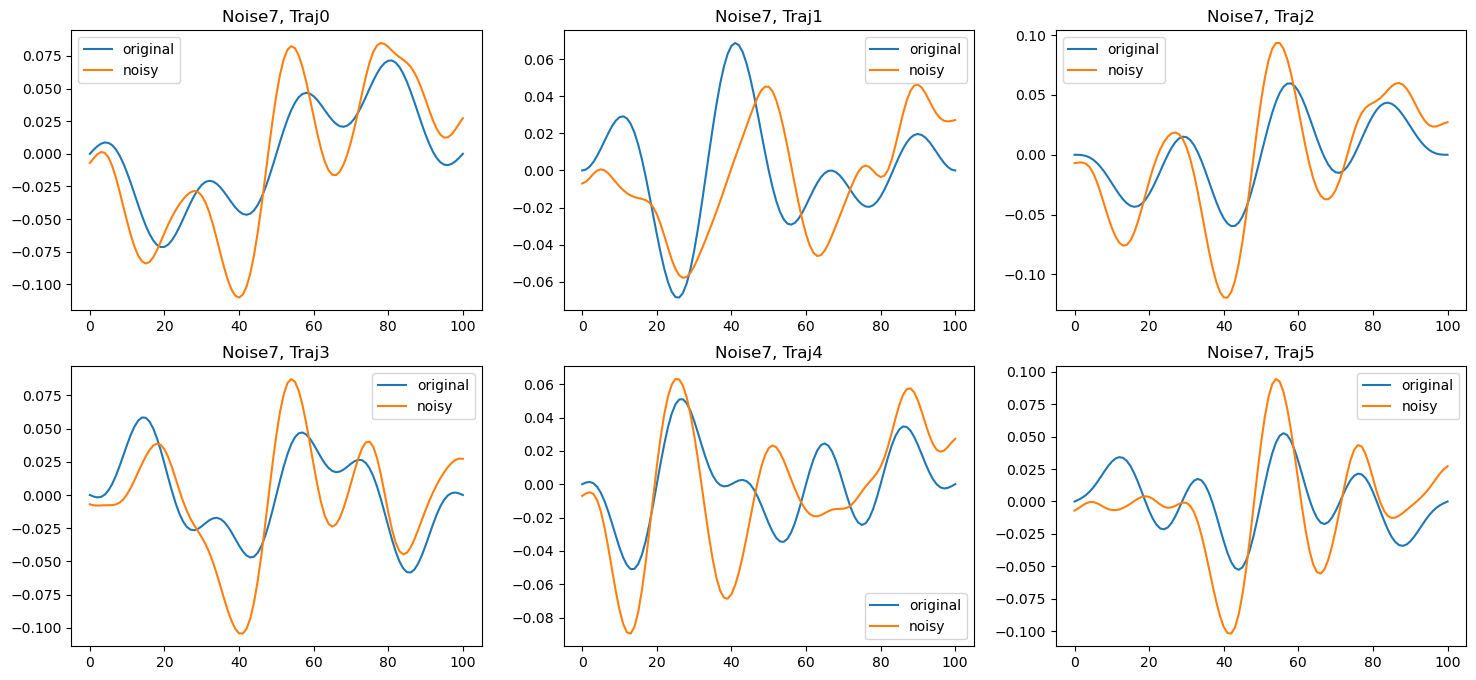

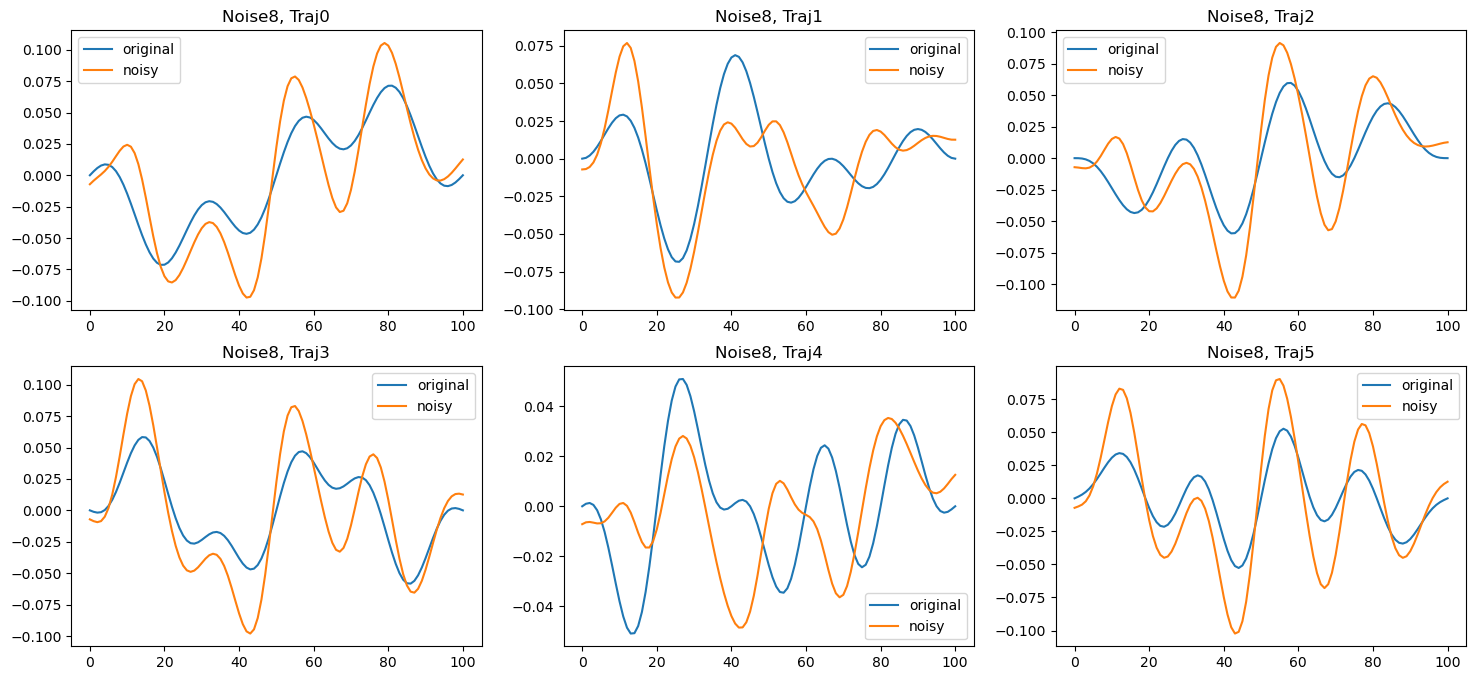

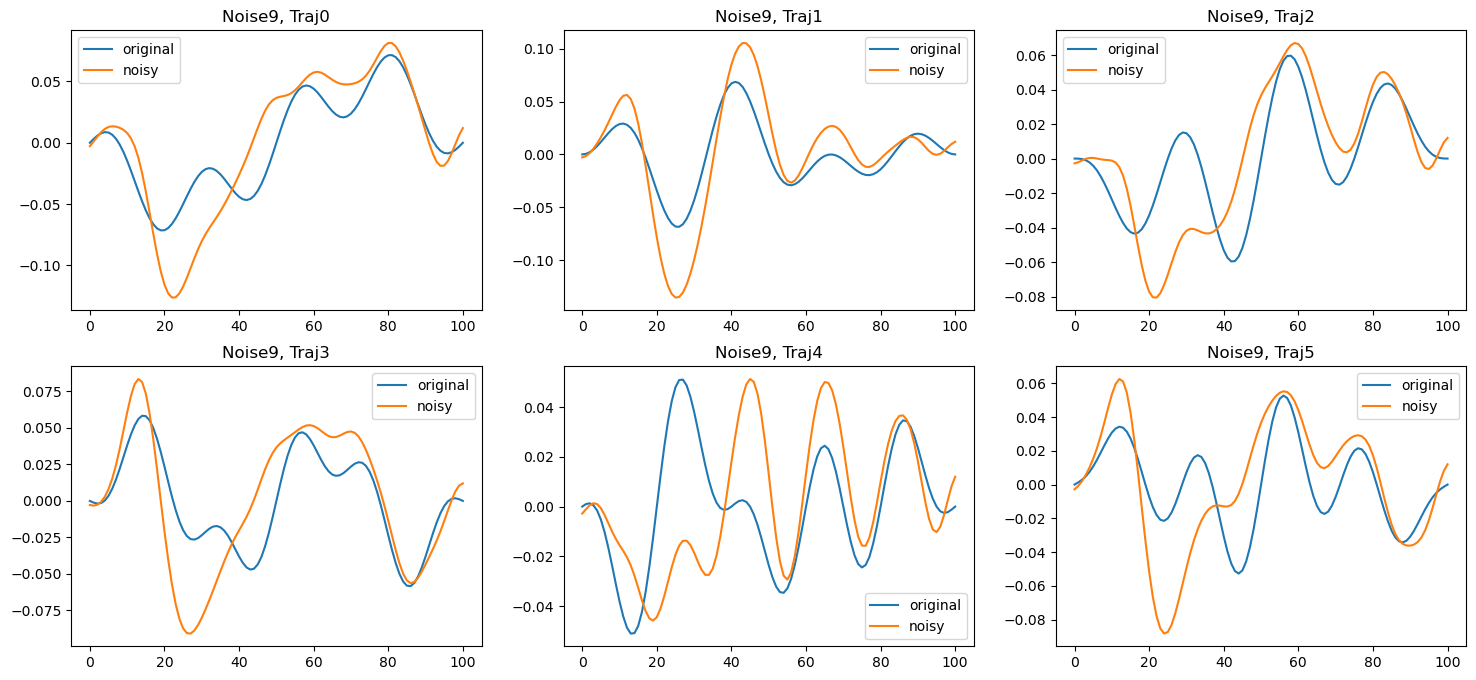

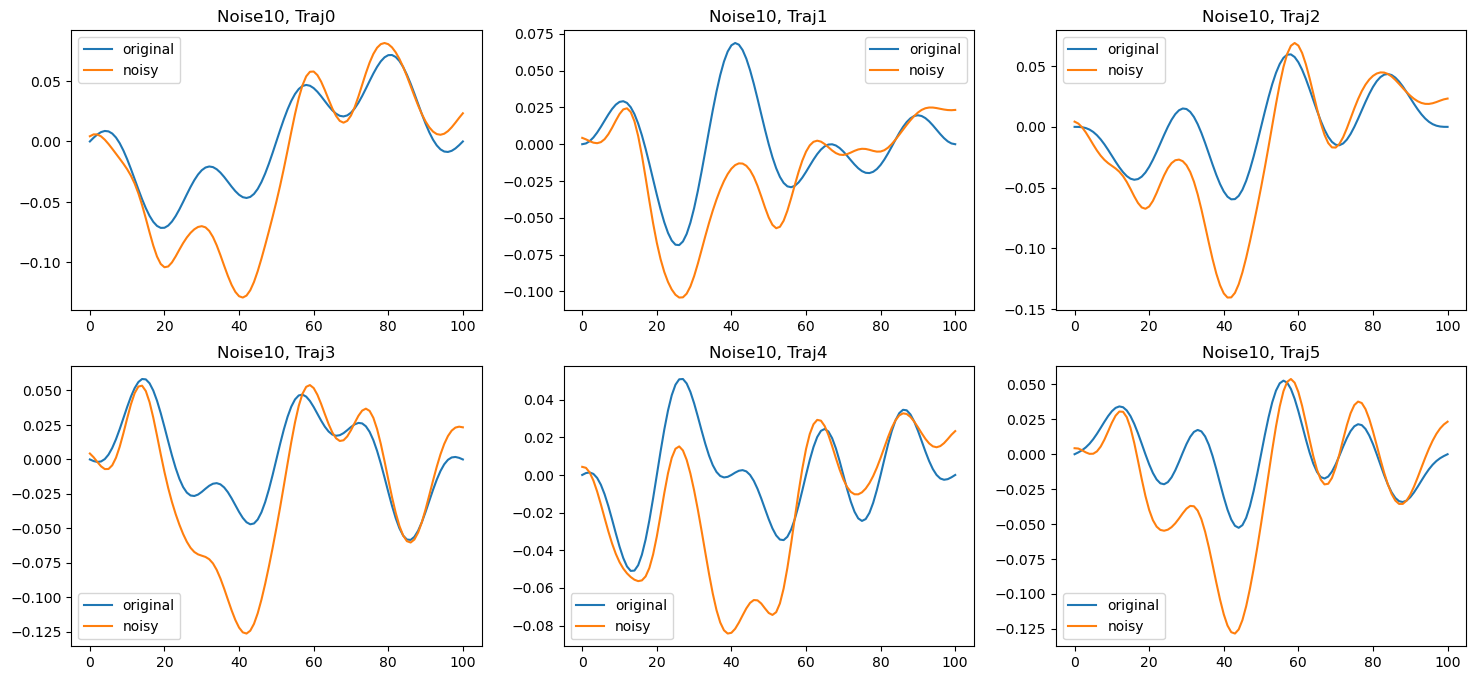

In [8]:
for noise_file_index in range(1, 11):

    file_folder = getcwd() + "/candidate_noise/"
    raw_noise_list = read_csv(file_folder+"noise"+str(noise_file_index)+".csv").columns.tolist()
    noise_list = [float(n) for n in raw_noise_list]
    npoints = len(noise_list)

    plt.figure(figsize=(18,8))

    for ti in range(1, 7):
        traj_points = get_traj_points(ti-1)
        overlay_points = [traj_points[i] + noise_list[i] for i in range(npoints)]
        plt.subplot(2, 3, ti)
        plt.plot(traj_points, label="original")
        plt.plot(overlay_points, label="noisy")
        plt.legend()
        plt.title("Noise%d, Traj%d" % (noise_file_index, ti-1))
        
    plt.show()